### Fruit Color Predictor: A Basic Machine Learning Example

This project demonstrates a simple machine learning model to classify fruits based on their color. We'll use a K-Nearest Neighbors (KNN) classifier, which is easy to understand and implement for such a task.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For reproducibility
np.random.seed(42)

#### 1. Generate Synthetic Data

We'll create a dataset with RGB color values for a few common fruits like apples, bananas, and oranges. Each color component (Red, Green, Blue) will be a feature.

In [2]:
# Define typical RGB ranges for fruits
# (R, G, B)

# Apples (mostly red, some green/yellow undertones)
apple_colors = np.array([
    [200, 50, 50],  # Red apple
    [180, 70, 70],
    [220, 40, 40],
    [150, 100, 50], # Greenish/yellowish apple
    [120, 130, 40]
])

# Bananas (mostly yellow)
banana_colors = np.array([
    [220, 220, 50], # Bright yellow banana
    [200, 200, 60],
    [240, 240, 30],
    [180, 180, 70], # Slightly riper
    [250, 250, 20]
])

# Oranges (mostly orange/red-yellow mix)
orange_colors = np.array([
    [255, 165, 0],  # Classic orange
    [230, 140, 10],
    [250, 175, 5],
    [200, 120, 20],
    [240, 150, 0]
])

# Generate more data points by adding some noise
def create_fruit_data(base_colors, num_samples_per_color, fruit_label):
    data = []
    labels = []
    for color in base_colors:
        for _ in range(num_samples_per_color):
            noisy_color = color + np.random.randint(-20, 20, size=3) # Add random noise
            noisy_color = np.clip(noisy_color, 0, 255) # Keep values within 0-255
            data.append(noisy_color)
            labels.append(fruit_label)
    return np.array(data), np.array(labels)

num_samples = 50 # Number of samples for each base color

apple_data, apple_labels = create_fruit_data(apple_colors, num_samples, 'Apple')
banana_data, banana_labels = create_fruit_data(banana_colors, num_samples, 'Banana')
orange_data, orange_labels = create_fruit_data(orange_colors, num_samples, 'Orange')

# Combine all data
X = np.vstack((apple_data, banana_data, orange_data))
y = np.hstack((apple_labels, banana_labels, orange_labels))

# Create a Pandas DataFrame
df = pd.DataFrame(X, columns=['Red', 'Green', 'Blue'])
df['Fruit'] = y

display(df.head())
display(df.tail())

,Red,Green,Blue,Fruit
0,218,58,44,Apple
1,187,50,68,Apple
2,198,52,40,Apple
3,190,53,65,Apple
4,219,53,32,Apple


,Red,Green,Blue,Fruit
745,221,158,12,Orange
746,229,169,0,Orange
747,247,140,13,Orange
748,227,151,0,Orange
749,234,146,2,Orange


#### 2. Visualize the Data

Let's visualize our synthetic 3D color data to see how well the different fruit colors are separated.

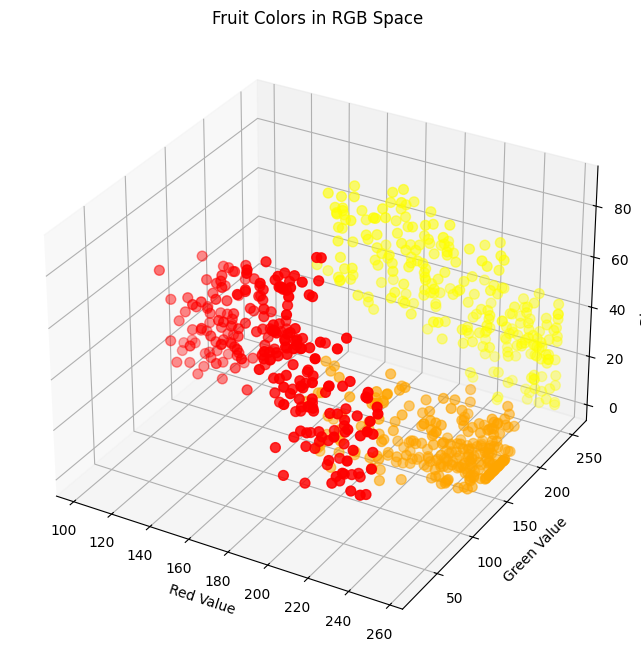

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map fruit labels to colors for plotting
color_map = {'Apple': 'red', 'Banana': 'yellow', 'Orange': 'orange'}
plot_colors = [color_map[label] for label in df['Fruit']]

ax.scatter(df['Red'], df['Green'], df['Blue'], c=plot_colors, marker='o', s=50)

ax.set_xlabel('Red Value')
ax.set_ylabel('Green Value')
ax.set_zlabel('Blue Value')
ax.set_title('Fruit Colors in RGB Space')

plt.show()

#### 3. Prepare Data for Training

We'll split the dataset into training and testing sets to evaluate our model's performance on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (600, 3)
Testing data shape: (150, 3)


#### 4. Train the K-Nearest Neighbors Classifier

KNN is a non-parametric, lazy learning algorithm. It classifies a data point based on the majority class of its 'k' nearest neighbors.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5) # You can experiment with different values for k
knn.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


#### 5. Evaluate the Model

Let's check how well our model performs on the test set.

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy:.2f}")

Model Accuracy on Test Set: 1.00


#### 6. Make Predictions

Now, let's try to predict the fruit for some new, unseen color values.

In [ ]:
# Example new colors (R, G, B)
new_colors = np.array([
    [210, 45, 45],  # Should be Apple
    [230, 230, 40], # Should be Banana
    [245, 160, 10], # Should be Orange
    [100, 100, 100], # Unknown/Grey (will predict based on nearest neighbor)
    [150, 200, 50]  # Green (might be classified as apple or banana depending on exact values)
])

predictions = knn.predict(new_colors)

for i, color in enumerate(new_colors):
    print(f"RGB: {color} -> Predicted Fruit: {predictions[i]}")

RGB: [210  45  45] -> Predicted Fruit: Apple
RGB: [230 230  40] -> Predicted Fruit: Banana
RGB: [245 160  10] -> Predicted Fruit: Orange
RGB: [100 100 100] -> Predicted Fruit: Apple
RGB: [150 200  50] -> Predicted Fruit: Banana
